### This a Capstone project using World Health related data
## Scope is Identifying Most prevalence disease in USA and use the data related thise diseases from other countries world wide, and connecting to statistics like individual smoking habbit by country to see any pattern to establish the probable reason for cancer as Smoking.  

In [1]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display="diagram")

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### <font style='color:blue;'>STARTING MARKDOWN AND ORIGINAL CELLS RELATED TO MAIN DATASET</font>
#### During performing EDA the main Dataset couldn't be uploaded to github over 25MB as it was 99MB. 
  <i>
  NOTE: Uploaded filitered Data , but added actual cells after this Markdown cells per Instructor's Request.
  </i>
Listing following steps from local system with results and Decisions taken in shortlising the Dataset for further anaysis and making necessary predictions as suggestions for better cure.
#### Loading Original Data
<i>ghs = pd.read_csv("data/Global Health Statistics.csv")</i>
<br>print(ghs.info) </br>
<i>
    <p style="font-size: 10px;"> bound method DataFrame.info of              Country  Year         Disease Name Disease Category  \
0              Italy  2013              Malaria      Respiratory   
1             France  2002                Ebola        Parasitic   
2             Turkey  2015             COVID-19          Genetic   
3          Indonesia  2011  Parkinson's Disease       Autoimmune   
4              Italy  2013         Tuberculosis          Genetic   
...              ...   ...                  ...              ...   
999995  Saudi Arabia  2021  Parkinson's Disease       Infectious   
999996  Saudi Arabia  2013              Malaria      Respiratory   
999997           USA  2016                 Zika      Respiratory   
999998       Nigeria  2020               Asthma          Chronic   
999999     Indonesia  2004               Asthma     Neurological   

<p style="font-size: 10px;">        Prevalence Rate (%)  Incidence Rate (%)  Mortality Rate (%) Age Group  \
0                      0.95                1.55                8.42      0-18   
1                     12.46                8.63                8.75       61+   
2                      0.91                2.35                6.22     36-60   
3                      4.68                6.29                3.99      0-18   
4                      0.83               13.59                7.01       61+   
...                     ...                 ...                 ...       ...   
999995                 4.56                4.83                9.65      0-18   
999996                 0.26                1.76                0.56      0-18   
999997                13.44               14.13                1.91     19-35   
999998                 1.96               14.56                4.98       61+   
999999                15.58                9.84                0.51     36-60   

<p style="font-size: 10px;">        Gender  Population Affected  ...  Hospital Beds per 1000  \
0         Male               471007  ...                    7.58   
1         Male               634318  ...                    5.11   
2         Male               154878  ...                    3.49   
3        Other               446224  ...                    8.44   
4         Male               472908  ...                    5.90   
...        ...                  ...  ...                     ...   
999995  Female               119332  ...                    4.23   
999996  Female               354927  ...                    6.34   
999997   Other               807915  ...                    8.11   
999998  Female               385896  ...                    6.91   
999999   Other               632775  ...                    6.79   

<p style="font-size: 10px;">        Treatment Type  Average Treatment Cost (USD)  \
0           Medication                         21064   
1              Surgery                         47851   
2          Vaccination                         27834   
3              Surgery                           144   
4           Medication                          8908   
...                ...                           ...   
999995     Vaccination                          4528   
999996         Surgery                         20686   
999997         Therapy                         18807   
999998      Medication                         21033   
999999         Therapy                           505   

<p style="font-size: 10px;">       Availability of Vaccines/Treatment  Recovery Rate (%) DALYs  \
0                                      No              91.82  4493   
1                                     Yes              76.65  2366   
2                                     Yes              98.55    41   
3                                     Yes              67.35  3201   
4                                     Yes              50.06  2832   
...                                   ...                ...   ...   
999995                                Yes              92.11  1024   
999996                                 No              84.47   202   
999997                                 No              86.81  3338   
999998                                Yes              62.15  4806   
999999                                Yes              77.23  3241   

<p style="font-size: 10px;">        Improvement in 5 Years (%)  Per Capita Income (USD)  Education Index  \
0                             2.16                    16886             0.79   
1                             4.82                    80639             0.74   
2                             5.81                    12245             0.41   
3                             2.22                    49336             0.49   
4                             6.93                    47701             0.50   
...                            ...                      ...              ...   
999995                        3.88                    29335             0.75   
999996                        7.95                    30752             0.47   
999997                        7.31                    62897             0.72   
999998                        3.82                    98189             0.51   
999999                        1.11                    79640             0.42   

<p style="font-size: 10px;">        Urbanization Rate (%)  
0                       86.02  
1                       45.52  
2                       40.20  
3                       58.47  
4                       48.14  
...                       ...  
999995                  27.94  
999996                  77.66  
999997                  46.90  
999998                  34.73  
999999                  78.51  

<p style="font-size: 10px;">[1000000 rows x 22 columns]
</p></i>

<img src="images/Fig 1-Global Heathcare Statistics.PNG" ></img>

#### Fetching top most Mortality based diseases in the USA  and anlyzing against the data from other countries. 
<img src="images/Fig 2-Global Heathcare Statistics-Mortality in USA.PNG"></>

<img src="images/Fig 3-Global Heathcare Statistics-diseases for Mortality in USA.PNG" > </>

#### Fetching Global data for selected Diseases
<p>
fig, ax = plt.subplots(figsize=(30, 6))
<BR/>scatter1 = ax.scatter( ghs['Disease Name'],ghs['Country'], c=ghs['Mortality Rate (%)'], cmap='viridis', s=100, alpha=0.7, edgecolor='k')
</p>

#### Add a color bar to explain the third variable (z)
<p>
cbar = plt.colorbar(scatter1)
cbar.set_label('#')
</p>

#### Set labels and title
ax.set_ylabel('Country')
ax.set_xlabel('Disease Name')
ax.set_title('Scatter Plot with Mortality Rate (%) (Color Coded)')

plt.show()
</p>
<img src="images/Fig 4-Scatter Chart for Global Statistics-Top Mortality based Diseases in USA.PNG"></img>

### STARTING <font color="blue">ORIGINAL</font> CELLS PERFORMING EDA ON ORIGINAL FULL DATASET HAVING 99MB,
   #### <i>NOT UPLOADED HERE DUE TO SIZE LIMIT </i>
#### LOADING ORIGINAL FULL DATASET

In [ ]:
print(ghs.info)

#### PLOTTING USING SCATTEER PLOT to PRESENT VISUALIZATION OF THE DEISEAS AND THEIR MORTALITY BY COUNTRIES

In [ ]:
fig, ax = plt.subplots(figsize=(30, 6))
scatter1 = ax.scatter( ghs['Disease Name'],ghs['Country'], c=ghs['Mortality Rate (%)'], cmap='viridis', s=100, alpha=0.7, edgecolor='k')

# Add a color bar to explain the third variable (z)
cbar = plt.colorbar(scatter1)
cbar.set_label('#')

# Set labels and title
ax.set_ylabel('Country')
ax.set_xlabel('Disease Name')
ax.set_title('Scatter Plot with Mortality Rate (%) (Color Coded)')
#
plt.show()

#### IDENTIFYING DISEASES IN USA BY MORTALITY RATE AS NEXT LEVEL FILTERING

In [ ]:
df_val =pd.DataFrame((ghss[ghss['Country']=="USA"]),columns=['Mortality Rate (%)']).dropna().drop_duplicates()
df_val.head()
print(df_val.sort_values(by='Mortality Rate (%)',ascending=False))


#### LISTING DISEASES HAVING TOP MORTALITY RATE IN USA 

In [ ]:
ghs_dssusa = pd.DataFrame(ghss[(ghss['Country']=="USA") & (ghss['Mortality Rate (%)'] == 10.0)],columns=['Disease Name'] ).dropna().drop_duplicates()
print(ghs_dssusa)


#### SAVING DATA WITH TOP DISEASES IDENTIFIED IN THE ABOVE STEP , FROM ALL GLOBAL COUNTRIES 

In [ ]:
ghs_topdseas =  ghss[ (ghss['Disease Name'].isin(['Zika','Polio','Tuberculosis','Diabetes','Asthma','Hypertension','Rabies','Malaria','COVID-19','Influenza','Parkinson\'s Disease']))]
    
print(ghs_topdseas.sort_values(by='Population Affected',ascending=False))
ghs_topdseas.to_csv('data/Global Health statistics_filtered.csv')

### <font color="blue">END OF CELLS PERFORMING EDA ON FULL DATASET,NOT UPLOADED DUE TO SIZE LIMITATION </font>
## <font color="red">STARTING CELLS,USING FILTERED DATASET</font>
### LOADING FILTERED DATASET,FOR FURTHER EDA AND BUILDING MODELS

In [2]:
ghs = pd.read_csv('data/Global Health statistics_filtered.zip', compression = 'zip')
ghs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499910 entries, 0 to 499909
Data columns (total 23 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Unnamed: 0                          499910 non-null  int64  
 1   Country                             499910 non-null  object 
 2   Year                                499910 non-null  int64  
 3   Disease Name                        499910 non-null  object 
 4   Disease Category                    499910 non-null  object 
 5   Prevalence Rate (%)                 499910 non-null  float64
 6   Incidence Rate (%)                  499910 non-null  float64
 7   Mortality Rate (%)                  499910 non-null  float64
 8   Age Group                           499910 non-null  object 
 9   Gender                              499910 non-null  object 
 10  Population Affected                 499910 non-null  int64  
 11  Healthcare Access (%)     

### Load and Train with Shortlisted Global data

In [7]:
ghs = pd.read_csv('data/Global Health statistics_filtered.zip', compression = 'zip')
ghs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499910 entries, 0 to 499909
Data columns (total 23 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Unnamed: 0                          499910 non-null  int64  
 1   Country                             499910 non-null  object 
 2   Year                                499910 non-null  int64  
 3   Disease Name                        499910 non-null  object 
 4   Disease Category                    499910 non-null  object 
 5   Prevalence Rate (%)                 499910 non-null  float64
 6   Incidence Rate (%)                  499910 non-null  float64
 7   Mortality Rate (%)                  499910 non-null  float64
 8   Age Group                           499910 non-null  object 
 9   Gender                              499910 non-null  object 
 10  Population Affected                 499910 non-null  int64  
 11  Healthcare Access (%)     

In [6]:
ghs.head()

,Unnamed: 0,Country,Year,Disease Name,Disease Category,Prevalence Rate (%),Incidence Rate (%),Mortality Rate (%),Age Group,Gender,...,Hospital Beds per 1000,Treatment Type,Average Treatment Cost (USD),Availability of Vaccines/Treatment,Recovery Rate (%),DALYs,Improvement in 5 Years (%),Per Capita Income (USD),Education Index,Urbanization Rate (%)
0,0,Italy,2013,Malaria,Respiratory,0.95,1.55,8.42,0-18,Male,...,7.58,Medication,21064,No,91.82,4493,2.16,16886,0.79,86.02
1,2,Turkey,2015,COVID-19,Genetic,0.91,2.35,6.22,36-60,Male,...,3.49,Vaccination,27834,Yes,98.55,41,5.81,12245,0.41,40.20
2,4,Italy,2013,Tuberculosis,Genetic,0.83,13.59,7.01,61+,Male,...,5.90,Medication,8908,Yes,50.06,2832,6.93,47701,0.50,48.14
3,6,USA,2013,Malaria,Cardiovascular,18.42,6.33,9.33,61+,Female,...,3.31,Surgery,15579,No,92.80,4535,0.89,60027,0.70,20.48
4,7,Nigeria,2007,Tuberculosis,Neurological,3.48,5.71,1.21,0-18,Female,...,3.54,Medication,15744,Yes,65.45,4584,9.81,23222,0.46,66.49


## Plot Heatmap with Shortlisted data for further Analysis

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

#### USING 'Mortality Rate (%)'

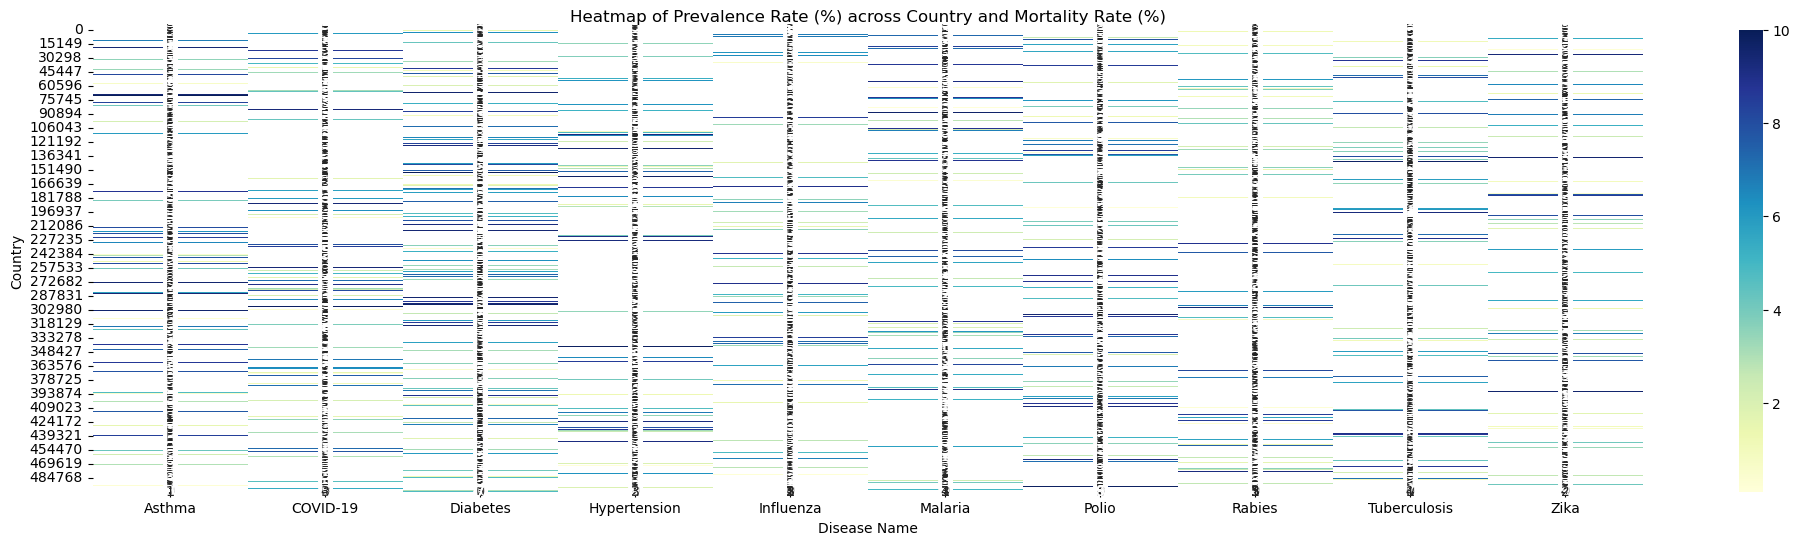

In [5]:
heatmap_data = ghs.pivot( columns=['Disease Name'], values='Mortality Rate (%)')
# 3. Create the heatmap
plt.figure(figsize=(25, 16))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt=".0f")
plt.title('Heatmap of Mortality Rate (%) across Country')
plt.xlabel('Disease Name')
plt.ylabel('Country')
plt.show()

#### USING SciKit-Learn SequentialFeatureSelector, to identify the most influential feature that has impact on the  Recovery Rate (%)

pip install category-encoders

In [4]:
from sklearn.feature_selection import SequentialFeatureSelector
from time import time
from sklearn.linear_model import RidgeCV
import category_encoders as ce

#### Encoding Categorical and Numeric values to be numeric for Models to accept clean data.¶

In [5]:
categorical_cols = ['Country','Disease Name','Disease Category','Age Group','Gender','Treatment Type','Availability of Vaccines/Treatment']


In [6]:
enc = ce.CatBoostEncoder(cols=categorical_cols)
print(enc)
y = pd.DataFrame(ghs['Recovery Rate (%)'])
ghs.info()

CatBoostEncoder(cols=['Country', 'Disease Name', 'Disease Category',
                      'Age Group', 'Gender', 'Treatment Type',
                      'Availability of Vaccines/Treatment'])
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499910 entries, 0 to 499909
Data columns (total 23 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Unnamed: 0                          499910 non-null  int64  
 1   Country                             499910 non-null  object 
 2   Year                                499910 non-null  int64  
 3   Disease Name                        499910 non-null  object 
 4   Disease Category                    499910 non-null  object 
 5   Prevalence Rate (%)                 499910 non-null  float64
 6   Incidence Rate (%)                  499910 non-null  float64
 7   Mortality Rate (%)                  499910 non-null  float64
 8   Age Group                      

In [10]:
print(ghs.shape)
print(y.shape)
ghs[categorical_cols] = enc.fit_transform(ghs[categorical_cols],y)


(499910, 23)
(499910, 1)


In [11]:

X_train, X_test, y_train, y_test = train_test_split(ghs, y, test_size=0.2, random_state=42)
y_train.head()

,Recovery Rate (%)
481890,70.86
319645,84.03
42951,98.95
70167,55.91
96418,62.61


In [12]:
ridge = RidgeCV(alphas=np.logspace(-6, 6, num=5)).fit(X_train, y_train)
importance = np.abs(ridge.coef_)
feature_names = ghs.columns

In [19]:


tic_fwd = time()
sfs_forward = SequentialFeatureSelector(
    ridge, n_features_to_select=3, direction="forward"
).fit(X_train, y_train)
toc_fwd = time()

tic_bwd = time()
sfs_backward = SequentialFeatureSelector(
    ridge, n_features_to_select=3, direction="backward"
).fit(X_train, y_train)
toc_bwd = time()

print(
    "Features selected by forward sequential selection: "
    f"{feature_names[sfs_forward.get_support()]}"
)
print(f"Done in {toc_fwd - tic_fwd:.3f}s")
print(
    "Features selected by backward sequential selection: "
    f"{feature_names[sfs_backward.get_support()]}"
)
print(f"Done in {toc_bwd - tic_bwd:.3f}s")

Features selected by forward sequential selection: Index(['Healthcare Access (%)', 'Recovery Rate (%)', 'Urbanization Rate (%)'], dtype='object')
Done in 61.828s
Features selected by backward sequential selection: Index(['Year', 'Mortality Rate (%)', 'Healthcare Access (%)'], dtype='object')
Done in 1188.737s


#### Using Randomized Search Model from SciKit-Learn

In [13]:
from scipy.stats import randint, uniform
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split


In [14]:
# 2. Define the model
rf = RandomForestClassifier()
print(X_train.shape)
print(y_train.shape)

(399928, 23)
(399928, 1)


In [15]:

param_dist = {
    'n_estimators': randint(50, 500),         # Number of trees
    'max_depth': [None, 10, 20, 30],          # Discrete list
    'min_samples_split': randint(2, 11),      # Integer distribution
    'bootstrap': [True, False],                # Categorical
    'max_features': uniform(0.1, 0.9)         # Percentage of features
}
scoring = {
    'accuracy': 'accuracy',
    'auc': 'roc_auc',
    'f1_macro': 'f1_macro'
}


In [17]:

rnd_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, scoring='accuracy',n_iter=20, cv=5,verbose=1,error_score='raise')


In [ ]:
y_ravel = y.ravel()
X_train, X_test, y_train, y_test = train_test_split(ghs, y_ravel, test_size=0.2, random_state=42)
print(y_train.shape)
print(y_train)

In [ ]:
rnd_search.fit(X_train, y_train)
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best CV Score: {random_search.best_score_:.4f}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

#### TESTING THE MODEL AND PREDICTING 

In [ ]:

# The best model is automatically refit on the full training set
best_model = random_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print(f"Test Set Accuracy: {test_accuracy:.4f}")

In [ ]:
## Conclusion , After forward Sequential selection and Random Search Models, 
It became obvious that the features , 
'Healthcare Access (%)', 'Recovery Rate (%)', 'Urbanization Rate (%)'  are having positive correlation.

#### As the next steps, will continue to establish the above features against the Countries and Diseases,
#### for better Predictions as the suggestion for a quick Recovery.